In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
table = pd.read_csv('melb_data.csv', usecols=["BuildingArea", "Price"])
table.dropna(subset=['BuildingArea'], inplace=True)

area = np.array(table['BuildingArea'][:100])
price = np.array(table['Price'][:100])

table

Price  BuildingArea
1      1035000.0          79.0
2      1465000.0         150.0
4      1600000.0         142.0
6      1876000.0         210.0
7      1636000.0         107.0
...          ...           ...
13572   650000.0          79.0
13573   635000.0         172.0
13576  1031000.0         133.0
13578  2500000.0         157.0
13579  1285000.0         112.0

[7130 rows x 2 columns]

In [5]:
# Create one feature array for "building area".
# Prepend x_0 = 1
X=[]
for row in area:
    X.append([1, row])

X = np.array(X)
Y = np.array(price)

<Axes: >

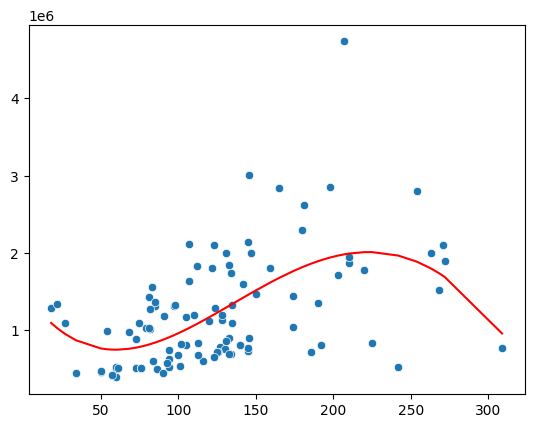

In [70]:
# Solve for theta with scikit learn
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(np.array(area).reshape(-1,1))
model = LinearRegression()

model.fit(poly_features, Y)

y_predicted = model.predict(poly_features)

# Plot solution.
fig, ax = plt.subplots()
sns.scatterplot(x=area, y=price, ax=ax)
sns.lineplot(x=area, y=y_predicted, c="red")

In [71]:
def J(theta, x, y):
    '''Quadratic error function used by linear regression'''
    return sum([(sum([theta[j] * x[i][j] for j in range(len(theta))]) - y[i])**2 for i in range(len(x))]) * 0.5 / len(y)

MSE = 2 * J(model.coef_, poly_features, Y)

average_price = sum(Y)/len(Y)
variance = sum([(y - average_price)**2 for y in Y]) / len(Y)
R2 = 1 - MSE / variance
R2

np.float64(-4.174098651738424)